In [8]:
import pandas as pd 
import joblib
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [4]:
df_train = pd.read_csv('../static/data/digits_train.csv')
df_train.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,6.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,4.0,16.0,16.0,15.0,16.0,16.0,2
1,0.0,0.0,4.0,16.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,12.0,12.0,2.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,3.0,12.0,12.0,14.0,15.0,3.0,0.0,0.0,4.0,...,0.0,0.0,2.0,15.0,16.0,14.0,3.0,0.0,0.0,5
4,0.0,0.0,6.0,11.0,16.0,16.0,3.0,0.0,0.0,5.0,...,0.0,0.0,0.0,5.0,16.0,13.0,0.0,0.0,0.0,5


In [5]:
df_train.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1347.0,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,...,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,0.0,0.317001,5.325909,11.883445,11.809948,5.787676,1.351151,0.126949,0.005939,2.118782,...,0.196733,0.000742,0.290275,5.657758,12.213066,11.832220,6.786192,2.099480,0.353378,4.494432
std,0.0,0.931391,4.775178,4.208947,4.328741,5.692418,3.314934,1.050469,0.094234,3.316512,...,0.923068,0.027247,0.981819,5.113949,4.361272,4.902927,5.908441,4.136299,1.813724,2.865057
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,14.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,10.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [6]:
from sklearn.datasets import load_digits
digits = load_digits()

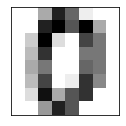

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(digits.images[0], cmap=plt.cm.binary, interpolation='nearest')
plt.xticks([]); plt.yticks([])
plt.show()

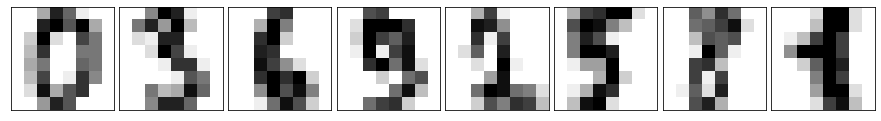

In [11]:
fig = plt.figure(figsize=(12, 2))  
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(1, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i*3], cmap=plt.cm.binary, interpolation='nearest')

In [12]:
df_test = pd.read_csv('../static/data/digits_test.csv')
df_test.head(3)

,index,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,667,0.0,0.0,4.0,16.0,15.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,12.0,14.0,11.0,0.0,0.0,1
1,971,0.0,0.0,5.0,15.0,14.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,4.0,11.0,13.0,16.0,11.0,0.0,9
2,914,0.0,0.0,7.0,14.0,9.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,5.0,15.0,16.0,16.0,12.0,1.0,9


In [14]:
df_test.describe()

,index,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,450.000000,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,930.055556,0.0,0.264444,4.842222,11.693333,11.962222,5.764444,1.395556,0.137778,0.004444,...,0.235556,0.0,0.246667,5.257778,11.717778,11.740000,6.697778,1.973333,0.397778,4.480000
std,528.963262,0.0,0.830288,4.679910,4.367750,4.163784,5.594109,3.361511,0.998281,0.094281,...,1.149253,0.0,0.774913,5.063978,4.398612,5.030548,5.883217,3.953426,1.994311,2.869205
min,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,483.750000,0.0,0.000000,0.000000,9.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,10.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,938.500000,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,1402.250000,0.0,0.000000,8.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,9.000000,15.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,1795.000000,0.0,6.000000,16.000000,16.000000,16.000000,16.000000,16.000000,12.000000,2.000000,...,13.000000,0.0,5.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [15]:
img_index_list = df_test['index'].values
target_index_list = df_test['target'].values
len(img_index_list), len(target_index_list)

(450, 450)

In [16]:
scaler = MinMaxScaler()
y_train = df_train.target.values
X_train = scaler.fit_transform(df_train.drop(columns='target', axis=1))
X_train.shape, y_train.shape

((1347, 64), (1347,))

In [17]:
y_test = df_test.target.values
X_test = scaler.fit_transform(df_test.drop(columns=['index','target'], axis=1))
X_test.shape, y_test.shape

((450, 64), (450,))

1. Logistic Regression

In [18]:
lr_clf = LogisticRegression()
lr_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [19]:
params = {
    #'C': [0.1, 1, 5, 10]
    #'C': [3, 4, 5, 6, 7]
    'C': [2, 3]
}

In [20]:
grid_cv = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

최고 평균 정확도: 0.9673
최적 파라미터: {'C': 2}


In [21]:
best_lr = grid_cv.best_estimator_
pred = best_lr.predict(X_test)
accuracy_score(y_test, pred)

0.9666666666666667

In [22]:
joblib.dump(best_lr, '../static/model/digits_lr.pkl')

['../static/model/digits_lr.pkl']

2. SVM

In [23]:
sv_clf = SVC()
sv_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [24]:
params = {
    #'C': [0.1, 1, 5, 7, 10]
    'C': [3, 4, 5, 6, 7]
}

In [25]:
grid_cv = GridSearchCV(sv_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

최고 평균 정확도: 0.9933
최적 파라미터: {'C': 4}


In [26]:
best_sv = grid_cv.best_estimator_
pred = best_sv.predict(X_test)
accuracy_score(y_test, pred)

0.9844444444444445

In [27]:
joblib.dump(best_sv, '../static/model/digits_sv.pkl')

['../static/model/digits_sv.pkl']

3. Random Forest

In [28]:
rf_clf = RandomForestClassifier()
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [29]:
params = {
    #'max_depth': [4, 6, 8, 10],
    #'max_depth': [8, 12, 14, 16],
    'max_depth': [14, 16, 18, 20],
    'min_samples_split': [2, 3, 4]
}

In [30]:
grid_cv = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

최고 평균 정확도: 0.9748
최적 파라미터: {'max_depth': 18, 'min_samples_split': 4}


In [31]:
best_rf = grid_cv.best_estimator_
pred = best_rf.predict(X_test)
accuracy_score(y_test, pred)

0.9688888888888889

In [32]:
joblib.dump(best_rf, '../static/model/digits_rf.pkl')

['../static/model/digits_rf.pkl']

Test

In [33]:
index = 101
scaled_test = scaler.fit_transform(df_test.drop(columns=['index','target'], axis=1))
scaled_test.shape

(450, 64)

In [34]:
test_data = scaled_test[index:index+5, :]
test_data.shape

(5, 64)

In [35]:
label_list = target_index_list[index:index+5]
label_list

array([8, 0, 0, 3, 1], dtype=int64)

In [36]:
pred_lr = best_lr.predict(test_data)
pred_sv = best_sv.predict(test_data)
pred_rf = best_rf.predict(test_data)

In [37]:
index_list = img_index_list[index:index+5]

In [38]:
result_dict = {'index':index_list, 'label':label_list,
               'pred_lr':pred_lr, 'pred_sv':pred_sv, 'pred_rf':pred_rf}

In [39]:
result_dict

{'index': array([1781,   10,   48,  865,   93], dtype=int64),
 'label': array([8, 0, 0, 3, 1], dtype=int64),
 'pred_lr': array([8, 0, 0, 3, 1], dtype=int64),
 'pred_sv': array([8, 0, 0, 3, 1], dtype=int64),
 'pred_rf': array([8, 0, 0, 3, 1], dtype=int64)}

In [40]:
img_file_wo_ext = '../static/img/digit'

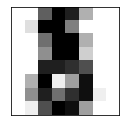

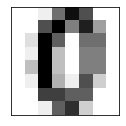

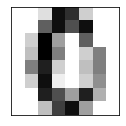

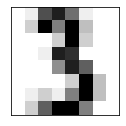

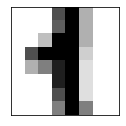

In [41]:
for k, i in enumerate(index_list):
    plt.figure(figsize=(2,2))
    plt.xticks([]); plt.yticks([])
    img_file = img_file_wo_ext + str(k+1) + '.png'
    plt.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    plt.savefig(img_file)